In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer

In [2]:
data = pd.read_csv("h1.csv")

In [3]:
features = data.iloc[:,1:-1].apply(pd.to_numeric,errors='coerce')

In [4]:
features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,172.84,98.12,128.77,137.21,158.30,114.57,201.28,318.04,150.05,175.24,111.69,205.66
1,164.53,278.42,149.00,196.62,129.02,159.48,110.91,74.23,197.32,146.66,222.04,192.03
2,8.15,7.11,4.60,9.72,13.65,4.41,6.58,5.11,10.07,1.36,43.39,8.72
3,20.15,0.00,5.75,21.89,25.66,10.08,11.30,19.71,30.16,12.24,86.72,28.25
4,282.09,161.15,161.94,134.60,515.80,136.66,167.54,163.56,173.26,181.18,136.06,305.26
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,237.42,136.46,208.61,100.29,89.06,178.65,387.96,483.09,213.05,297.57,77.10,171.68
2598,267.96,190.79,110.60,136.42,123.38,164.55,281.88,179.97,130.83,179.08,91.33,153.24
2599,171.62,175.75,101.00,209.71,89.96,95.30,188.06,81.11,123.92,104.60,104.08,115.44
2600,3.05,7.11,0.00,12.17,3.64,5.67,0.00,2.19,8.75,2.72,1.88,9.77


In [5]:
normalized_features = Normalizer().fit_transform(features)

In [6]:
normalized_features = pd.DataFrame(normalized_features) 

In [7]:
normalized_features.columns = ['DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 

In [8]:
normalized_features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,0.286972,0.162912,0.213801,0.227814,0.262830,0.190224,0.334192,0.528052,0.249133,0.290956,0.185442,0.341464
1,0.269772,0.456511,0.244308,0.322388,0.211548,0.261491,0.181854,0.121711,0.323536,0.240471,0.364068,0.314862
2,0.160772,0.140256,0.090742,0.191743,0.269268,0.086994,0.129801,0.100803,0.198647,0.026828,0.855937,0.172016
3,0.187312,0.000000,0.053451,0.203486,0.238532,0.093702,0.105043,0.183221,0.280363,0.113781,0.806137,0.262608
4,0.346188,0.197767,0.198737,0.165185,0.633003,0.167713,0.205609,0.200725,0.212629,0.222349,0.166976,0.374623
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,0.279480,0.160635,0.245567,0.118057,0.104838,0.210299,0.456689,0.568672,0.250793,0.350286,0.090759,0.202094
2598,0.438044,0.311891,0.180802,0.223011,0.201694,0.268996,0.460799,0.294203,0.213873,0.292749,0.149300,0.250507
2599,0.362535,0.371259,0.213355,0.442997,0.190034,0.201314,0.397263,0.171339,0.261772,0.220960,0.219861,0.243858
2600,0.145221,0.338531,0.000000,0.579454,0.173312,0.269967,0.000000,0.104273,0.416616,0.129508,0.089513,0.465182


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(normalized_features, normalized_features))

[[1.         0.83345033 0.5907562  ... 0.87608133 0.6977167  0.72925174]
 [0.83345033 1.         0.74347124 ... 0.94282086 0.8454682  0.8643023 ]
 [0.5907562  0.74347124 1.         ... 0.64024141 0.50546885 0.95397938]
 ...
 [0.87608133 0.94282086 0.64024141 ... 1.         0.81096952 0.76672273]
 [0.6977167  0.8454682  0.50546885 ... 0.81096952 1.         0.62189664]
 [0.72925174 0.8643023  0.95397938 ... 0.76672273 0.62189664 1.        ]]


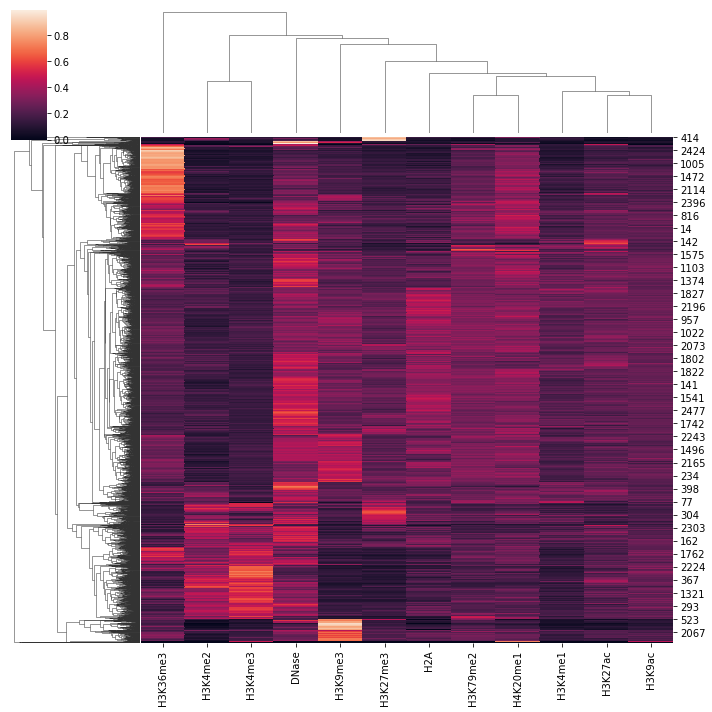

In [24]:
import seaborn as sns 

sns.clustermap(normalized_features)

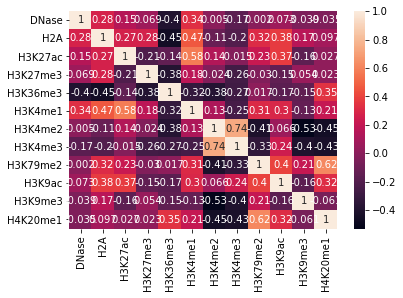

In [25]:
# generating correlation heatmap 
sns.heatmap(normalized_features.corr(), annot = True) 

plt.show() 

## Silhouette coefficient

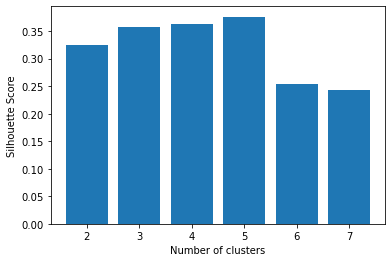

In [9]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [10]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [11]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=5, random_state=12)

In [12]:
print(kmeans.inertia_)

print(kmeans.cluster_centers_)

print(kmeans.n_iter_)

164.2596390061111
[[0.41300567 0.32672661 0.27040018 0.24514839 0.25182689 0.2351455
  0.17751152 0.16357031 0.30929804 0.25753701 0.2976223  0.32988742]
 [0.2853924  0.15263125 0.21545253 0.16148557 0.64807719 0.15589125
  0.12769817 0.1306315  0.26805829 0.2118155  0.20397412 0.36161646]
 [0.33530251 0.19485993 0.24264476 0.14753548 0.24134015 0.16267517
  0.41061073 0.50410597 0.22122244 0.25565118 0.1368135  0.22997111]
 [0.31717727 0.18667192 0.16034755 0.19495396 0.24710548 0.11420216
  0.09148136 0.13830489 0.24744229 0.16810305 0.6849885  0.21677722]
 [0.33649932 0.21825097 0.14958528 0.56157524 0.14626838 0.1918884
  0.33577882 0.23062235 0.19055269 0.17234833 0.17205979 0.24293588]]
51


In [26]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

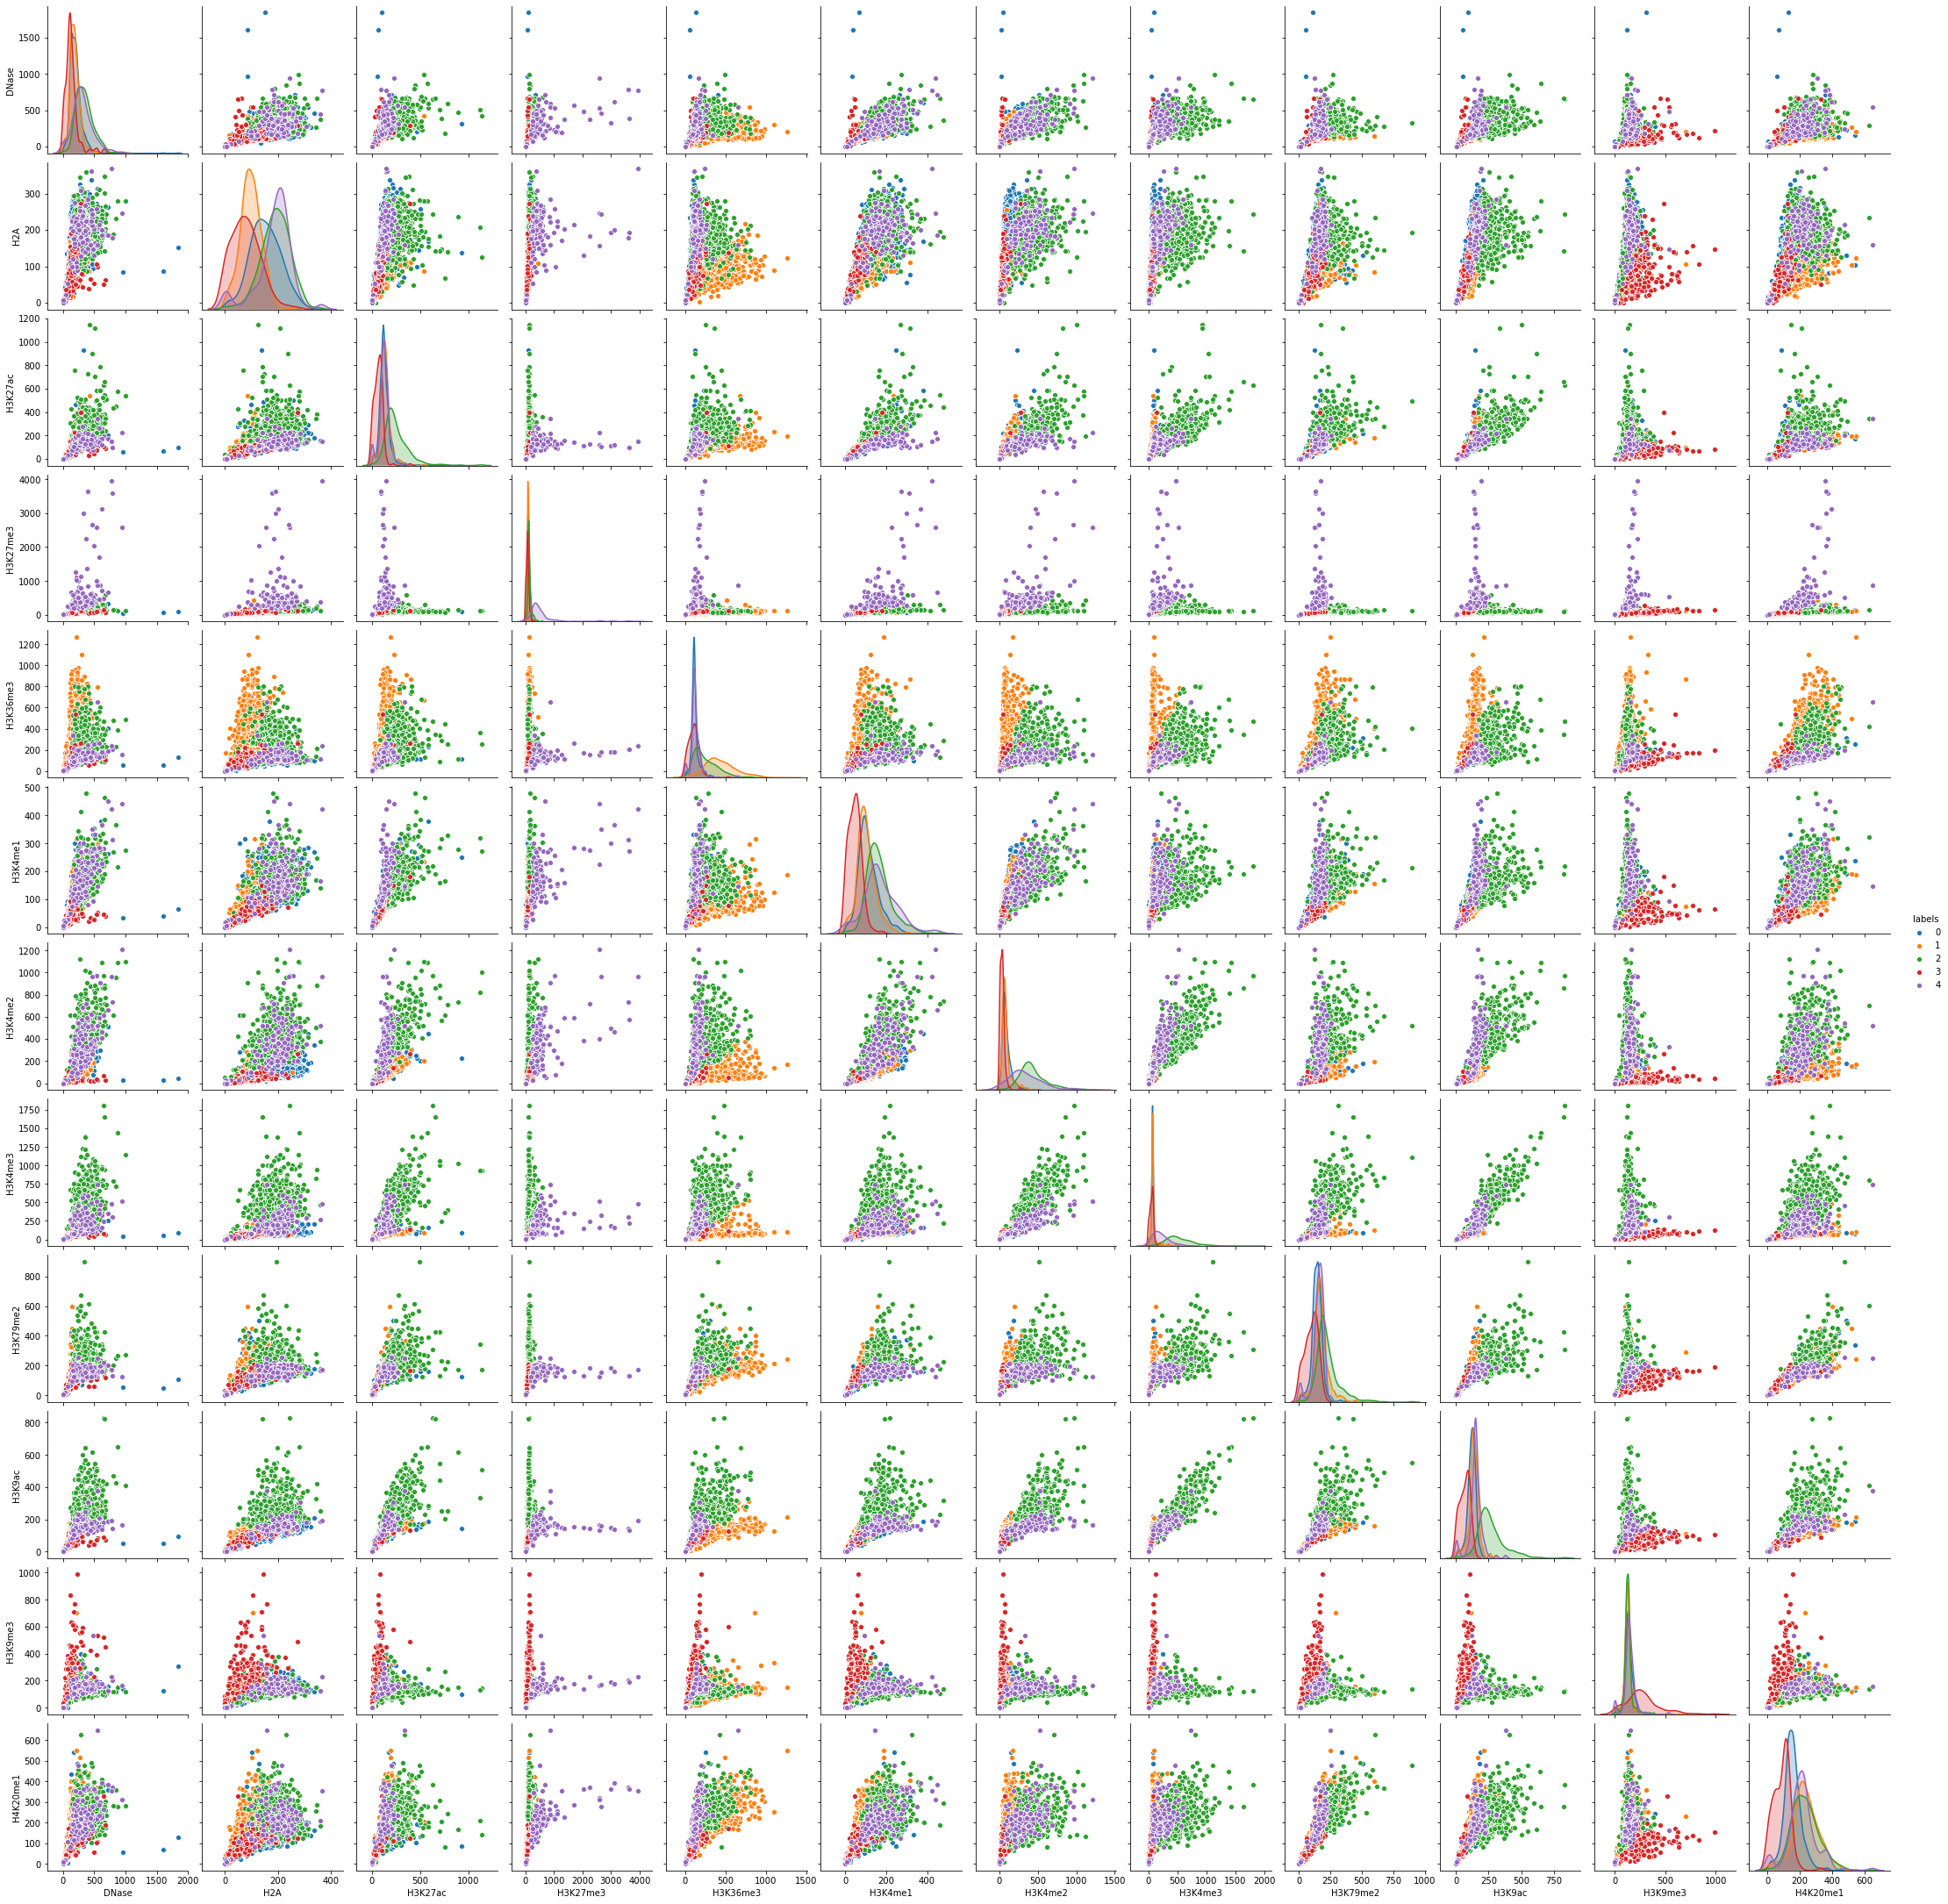

In [29]:
sns.pairplot(labeled,hue='labels')